# Conditional image generation

Conditional image generation allows you to generate images from a text prompt. The text is converted into embeddings which are used to condition the model to generate an image from noise.

The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) is the easiest way to use a pre-trained diffusion system for inference.

Start by creating an instance of [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) and specify which pipeline [checkpoint](https://huggingface.co/models?library=diffusers&sort=downloads) you would like to download.

In this guide, you'll use [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) for text-to-image generation with [`runwayml/stable-diffusion-v1-5`](https://huggingface.co/runwayml/stable-diffusion-v1-5):

In [4]:
from diffusers import DiffusionPipeline

model_name = "stable-diffusion-v1-5"
generator = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) downloads and caches all modeling, tokenization, and scheduling components.
Because the model consists of roughly 1.4 billion parameters, we strongly recommend running it on a GPU.
You can move the generator object to a GPU, just like you would in PyTorch:

In [5]:
generator.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Now you can use the `generator` on your text prompt:

In [6]:
image = generator("An image of a squirrel in Picasso style").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

The output is by default wrapped into a [`PIL.Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html?highlight=image#the-image-class) object.

You can save the image by calling:

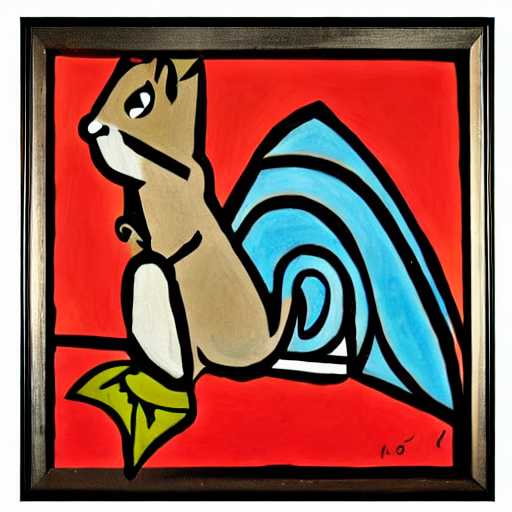

In [7]:
image

In [8]:
image.save(f"{model_name}_0.png")

Try out the Spaces below, and feel free to play around with the guidance scale parameter to see how it affects the image quality!

<iframe
	src="https://stabilityai-stable-diffusion.hf.space"
	frameborder="0"
	width="850"
	height="500"
></iframe>

1. generate celeba-like images from this model

In [ ]:
prompt = "a face of a celebrity"
image_domain = 'celeba'
n_samples = 16
for i in range(n_samples):
  image = generator(prompt).images[0]
  image.save(f"{model_name}_{image_domain}_{i}.png")
  print(f'done: {i}')


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

done: {i}


  0%|          | 0/50 [00:00<?, ?it/s]

2. generate cifar10-like images from this model:
- do generation for each label, by setting proper prompts



In [ ]:
image_domain = 'cifar10'
cifar10_labels = ['car'] #todo
n_samples = 16

for label in cifar10_labels:
  prompt = f'an image of {label}'
  for i in range(n_samples):
    image = generator(prompt).images[0]
    image.save(f"{model_name}_{image_domain}-{label}_{i}.png")
    print('done: {i}')

